In [1]:
import pandas as pd
from tensorflow import *
import numpy as np

### 2 classes: cats and dogs

In [2]:
train_ds_1, test_ds_1 = keras.utils.image_dataset_from_directory(
    "../data/data3/",
    validation_split=0.2, 
    subset="both",
    seed=42, 
    image_size=(200,400), 
    batch_size=32, 
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


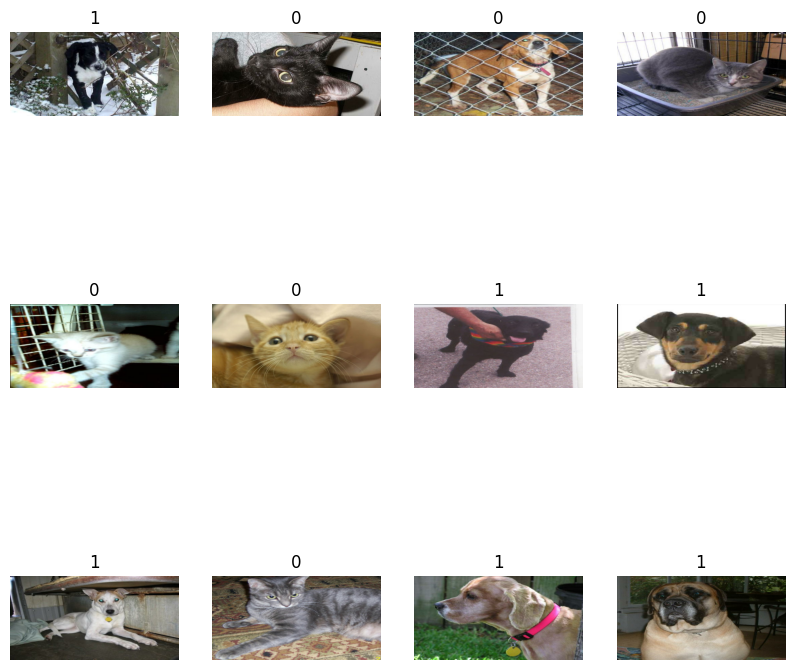

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_1.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, int(i + 1))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### Augmentation

In [4]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

In [5]:
for i in range(3):
    train_ds_1 = train_ds_1.map(
        lambda img, label: (data_augmentation(img), label)
    )

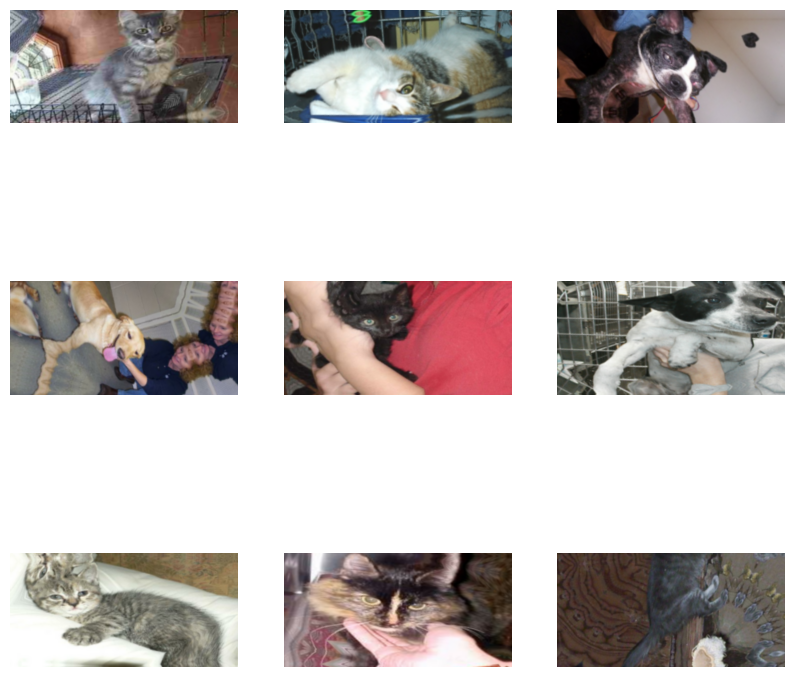

In [6]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds_1.take(4):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

### CNN

In [7]:
inputs = keras.Input(shape=(200, 400, 3))
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(128, 3, strides=4, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=4, padding="same")(x)
x = keras.layers.Conv2D(256, 4, strides=4, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=4, padding="same")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(2, activation="softmax")(x)
model1 = keras.Model(inputs, outputs)

In [8]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 400, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 100, 128)      3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 25, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 7, 256)         524544    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 2, 256)        0         
 2D)                                                         

In [9]:
model1.compile(optimizer=keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
model1.fit(train_ds_1, epochs=5, validation_data=test_ds_1)

Epoch 1/5
50/50 [==============================] - 72s 1s/step - loss: 0.6904 - accuracy: 0.5612 - val_loss: 0.6744 - val_accuracy: 0.5675
Epoch 2/5
50/50 [==============================] - 72s 1s/step - loss: 0.6742 - accuracy: 0.5731 - val_loss: 0.6517 - val_accuracy: 0.5875
Epoch 3/5
50/50 [==============================] - 72s 1s/step - loss: 0.6893 - accuracy: 0.5537 - val_loss: 0.6785 - val_accuracy: 0.5600
Epoch 4/5
50/50 [==============================] - 72s 1s/step - loss: 0.6799 - accuracy: 0.5775 - val_loss: 0.6919 - val_accuracy: 0.5600
Epoch 5/5
50/50 [==============================] - 1201s 24s/step - loss: 0.6851 - accuracy: 0.5475 - val_loss: 0.6745 - val_accuracy: 0.5525


In [11]:
img = keras.preprocessing.image.load_img(
    "../data/data3/cats/4113.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = expand_dims(img_array, 0)

predictions = model1.predict(img_array)
print(np.around(predictions, 2))

1/1 [==============================] - 0s 84ms/step
array([[0.59, 0.41]], dtype=float32)


In [12]:
img = keras.preprocessing.image.load_img(
    "../data/data3/dogs/132.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = expand_dims(img_array, 0)

predictions = model1.predict(img_array)
print(np.around(predictions, 2))

1/1 [==============================] - 0s 19ms/step
array([[0.46, 0.54]], dtype=float32)


### 3 classes: Leopard, kangaroo, llama

In [162]:
train_ds_2, test_ds_2 = keras.utils.image_dataset_from_directory(
    "../data/data4/",
    validation_split=0.15, 
    subset="both",
    seed=42, 
    image_size=(200,400), 
    batch_size=32, 
)

Found 364 files belonging to 3 classes.
Using 310 files for training.
Using 54 files for validation.


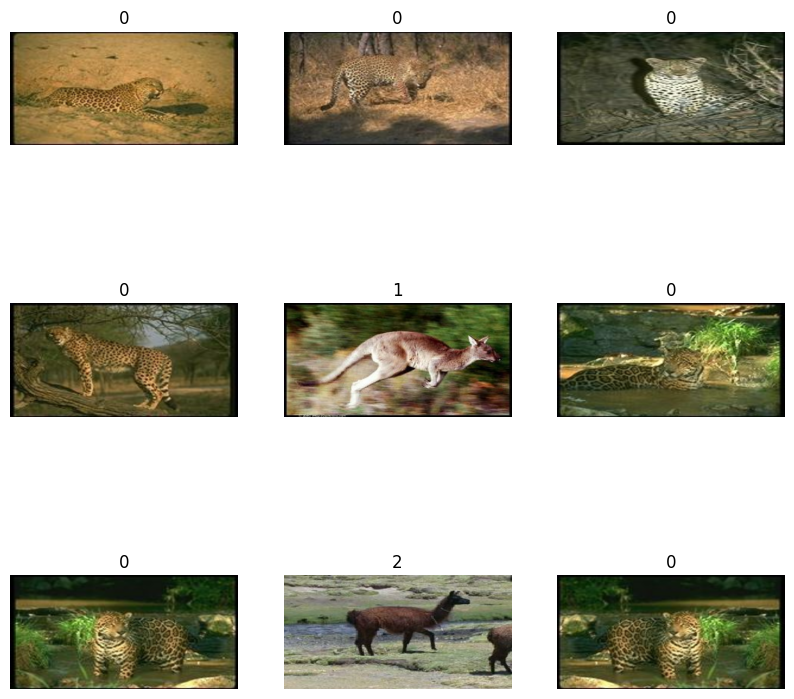

In [163]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_2.take(3):
    for i in range(9):
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [164]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

In [165]:
for i in range(4):
    train_ds_2 = train_ds_2.map(
        lambda img, label: (data_augmentation(img), label)
    )

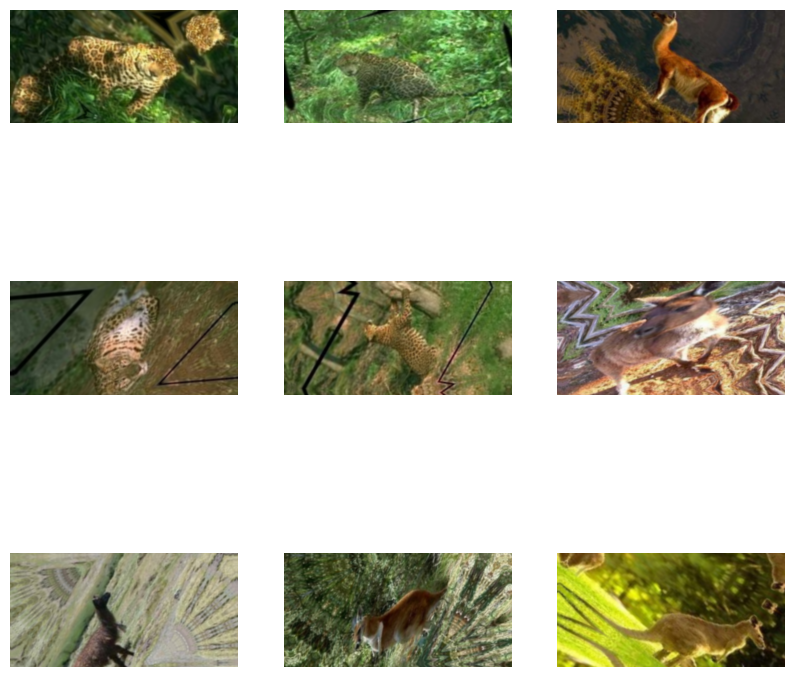

In [166]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds_2.take(4):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [194]:
inputs = keras.Input(shape=(200, 400, 3))
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(64, 3, strides=3, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Conv2D(128, 4, strides=3, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model2 = keras.Model(inputs, outputs)

In [195]:
model2.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 200, 400, 3)]     0         
                                                                 
 rescaling_25 (Rescaling)    (None, 200, 400, 3)       0         
                                                                 
 conv2d_51 (Conv2D)          (None, 67, 134, 64)       1792      
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 23, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 8, 15, 128)        131200    
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 3, 5, 128)        0         
 g2D)                                                     

In [196]:
model2.compile(optimizer=keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [205]:
model2.fit(train_ds_2, epochs=25, validation_data=test_ds_2)

Epoch 1/25
10/10 [==============================] - 9s 861ms/step - loss: 0.2183 - accuracy: 0.9065 - val_loss: 0.4008 - val_accuracy: 0.8519
Epoch 2/25
10/10 [==============================] - 9s 852ms/step - loss: 0.1896 - accuracy: 0.9161 - val_loss: 0.8124 - val_accuracy: 0.7222
Epoch 3/25
10/10 [==============================] - 9s 921ms/step - loss: 0.2063 - accuracy: 0.9129 - val_loss: 0.4899 - val_accuracy: 0.8148
Epoch 4/25
10/10 [==============================] - 9s 939ms/step - loss: 0.1622 - accuracy: 0.9419 - val_loss: 0.5022 - val_accuracy: 0.8148
Epoch 5/25
10/10 [==============================] - 9s 917ms/step - loss: 0.1873 - accuracy: 0.9097 - val_loss: 0.5120 - val_accuracy: 0.8148
Epoch 6/25
10/10 [==============================] - 9s 919ms/step - loss: 0.1874 - accuracy: 0.9258 - val_loss: 0.7392 - val_accuracy: 0.7593
Epoch 7/25
10/10 [==============================] - 9s 884ms/step - loss: 0.1830 - accuracy: 0.9065 - val_loss: 0.4046 - val_accuracy: 0.8704
Epoch 

In [228]:
img = keras.preprocessing.image.load_img(
    "../data/data4/Leopards/image_0085.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = expand_dims(img_array, 0)

predictions = model2.predict(img_array)

print(np.around(predictions, 3))

1/1 [==============================] - 0s 16ms/step
array([[1., 0., 0.]], dtype=float32)


In [227]:
img = keras.preprocessing.image.load_img(
    "../data/data4/llama/image_0012.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = expand_dims(img_array, 0)

predictions = model2.predict(img_array)
print(np.around(predictions, 3))

1/1 [==============================] - 0s 15ms/step
array([[0.027, 0.16 , 0.813]], dtype=float32)


In [226]:
img = keras.preprocessing.image.load_img(
    "../data/data4/kangaroo/image_0079.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = expand_dims(img_array, 0)

predictions = model2.predict(img_array)
print(np.around(predictions, 3))

1/1 [==============================] - 0s 16ms/step
array([[0.049, 0.944, 0.007]], dtype=float32)


In [248]:
model2.save("../models/lab5/model_3_classes_leopard_kangaroo_llama")

INFO:tensorflow:Assets written to: ../models/lab5/model_3_classes_leopard_kangaroo_llama\assets


INFO:tensorflow:Assets written to: ../models/lab5/model_3_classes_leopard_kangaroo_llama\assets
